# Solving Tic Tac Toe with Quantum Computing
In this notebook, we will explore how to apply quantum algorithms to solve the game of Tic Tac Toe. We will use two popular quantum algorithms: the Grover algorithm and the Quantum Approximate Optimization Algorithm (QAOA).

## 1. Introduction

### 1.1 Overview of Tic Tac Toe

Tic Tac Toe, also known as Noughts and Crosses, is a classic two-player game where players take turns marking spaces on a 3x3 grid. The grid is initially empty, and players alternate placing their symbols ('X' or 'O') in an attempt to form a horizontal, vertical, or diagonal line of three of their symbols. The game ends when one player achieves this goal, resulting in a win, or if the entire grid is filled without a winner, leading to a draw.

#### Key Rules:

1. **Players:** Two players, typically represented by 'X' and 'O'.
2. **Grid:** A 3x3 square grid.
3. **Objective:** Form a line of three of your symbols horizontally, vertically, or diagonally.
4. **Turns:** Players take turns to place their symbol in an empty grid space.
5. **Winning:** The game ends when a player forms a line of three symbols, declaring them the winner.
6. **Draw:** If the grid is fully occupied and no player has won, the game is a draw.

Tic Tac Toe is a simple yet strategic game often used for educational purposes to teach basic game theory concepts. Now, let's explore how quantum algorithms can be applied to enhance the strategies involved in playing Tic Tac Toe.


<div>
<p style = 'text-align:center;'>
<img src="../Images/tic-tac-toe-1777880_1280.jpg" alt="JuveYell" width="500px">
</p>
</div>

## 2. Grover's Algorithm

### 2.1 Explanation of Grover's Quantum Search Algorithm

Grover's Quantum Search Algorithm, developed by Lov Grover in 1996, is a potent quantum algorithm designed to perform a quadratic speedup in searching an unsorted database compared to the best classical algorithms. This algorithm relies on the principles of amplitude amplification, enabling efficient solution discovery within a large solution space.


### Key Concepts:



1. **Amplitude Amplification:**
In the quest for a marked element in a quantum list, we start in a uniform superposition:

   $$ \ket{s} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \ket{x} $$

   When measured in the standard basis, the probability of finding the correct element is $ \frac{1}{N} = \frac{1}{2^n} $. Amplitude amplification improves this probability by extending the amplitude of the marked element and reducing others. The algorithm's geometric interpretation involves two reflections generating a rotation in a two-dimensional plane. Introducing an additional state $ \ket{s'} $, perpendicular to $ \ket{w} $, achieves this by eliminating $ \ket{w} $ from $ \ket{s} $ and adjusting the scale.

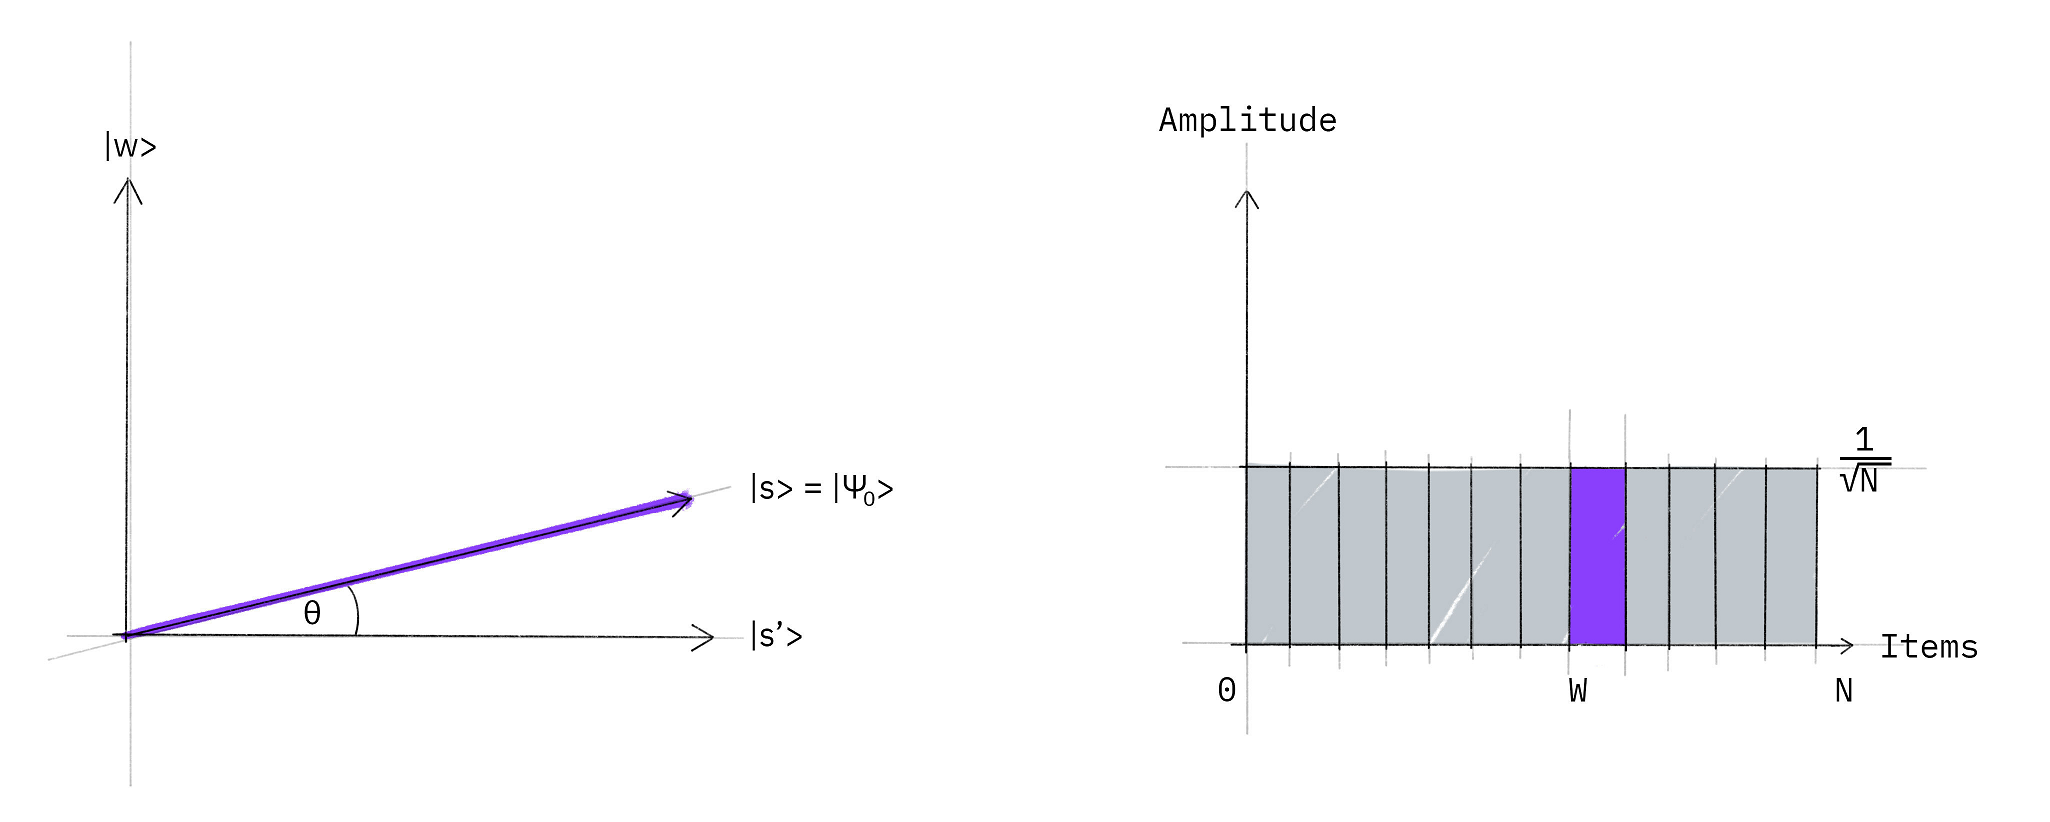

<p ><a href="https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm" target="_blank">Image obtained from the Qiskit Textbook</a></p>


2. **Oracle:**
   In quantum algorithms like Grover's, an oracle designates specific states as solutions. In Tic Tac Toe, it flips the sign of the probability amplitude for correct states:
   $$U_\omega\ket{x}=\begin{cases}
   \ket{x},& \text{si } x\neq \omega\\
   -\ket{x},& \text{si } x= \omega
   \end{cases}
   $$

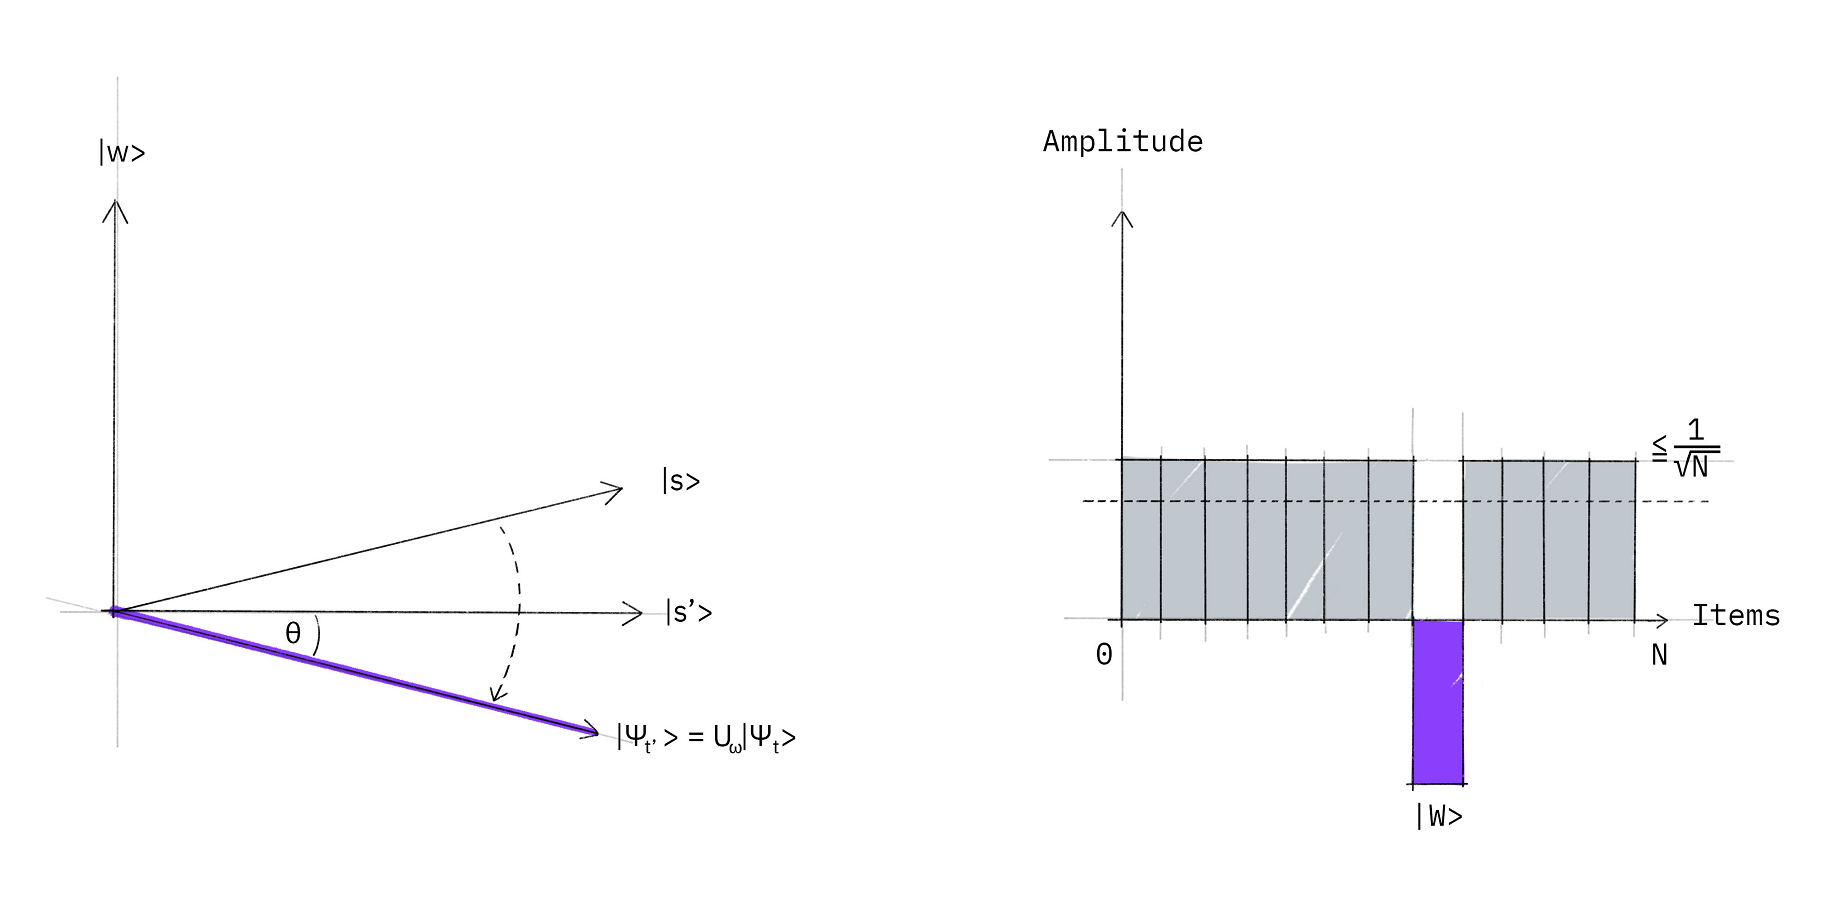

<p ><a href="https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm" target="_blank">Image obtained from the Qiskit Textbook</a></p>


3. **Grover Diffusion Operator:**
   The Grover diffusion operator enhances the amplitudes of marked states and suppresses unmarked states. It involves a sequence of quantum gates:
   $$U_s=2\ket{s}\bra{s}-\mathbb{1}$$
   This sequence concentrates probability amplitudes on marked states, contributing to the algorithm's efficiency.

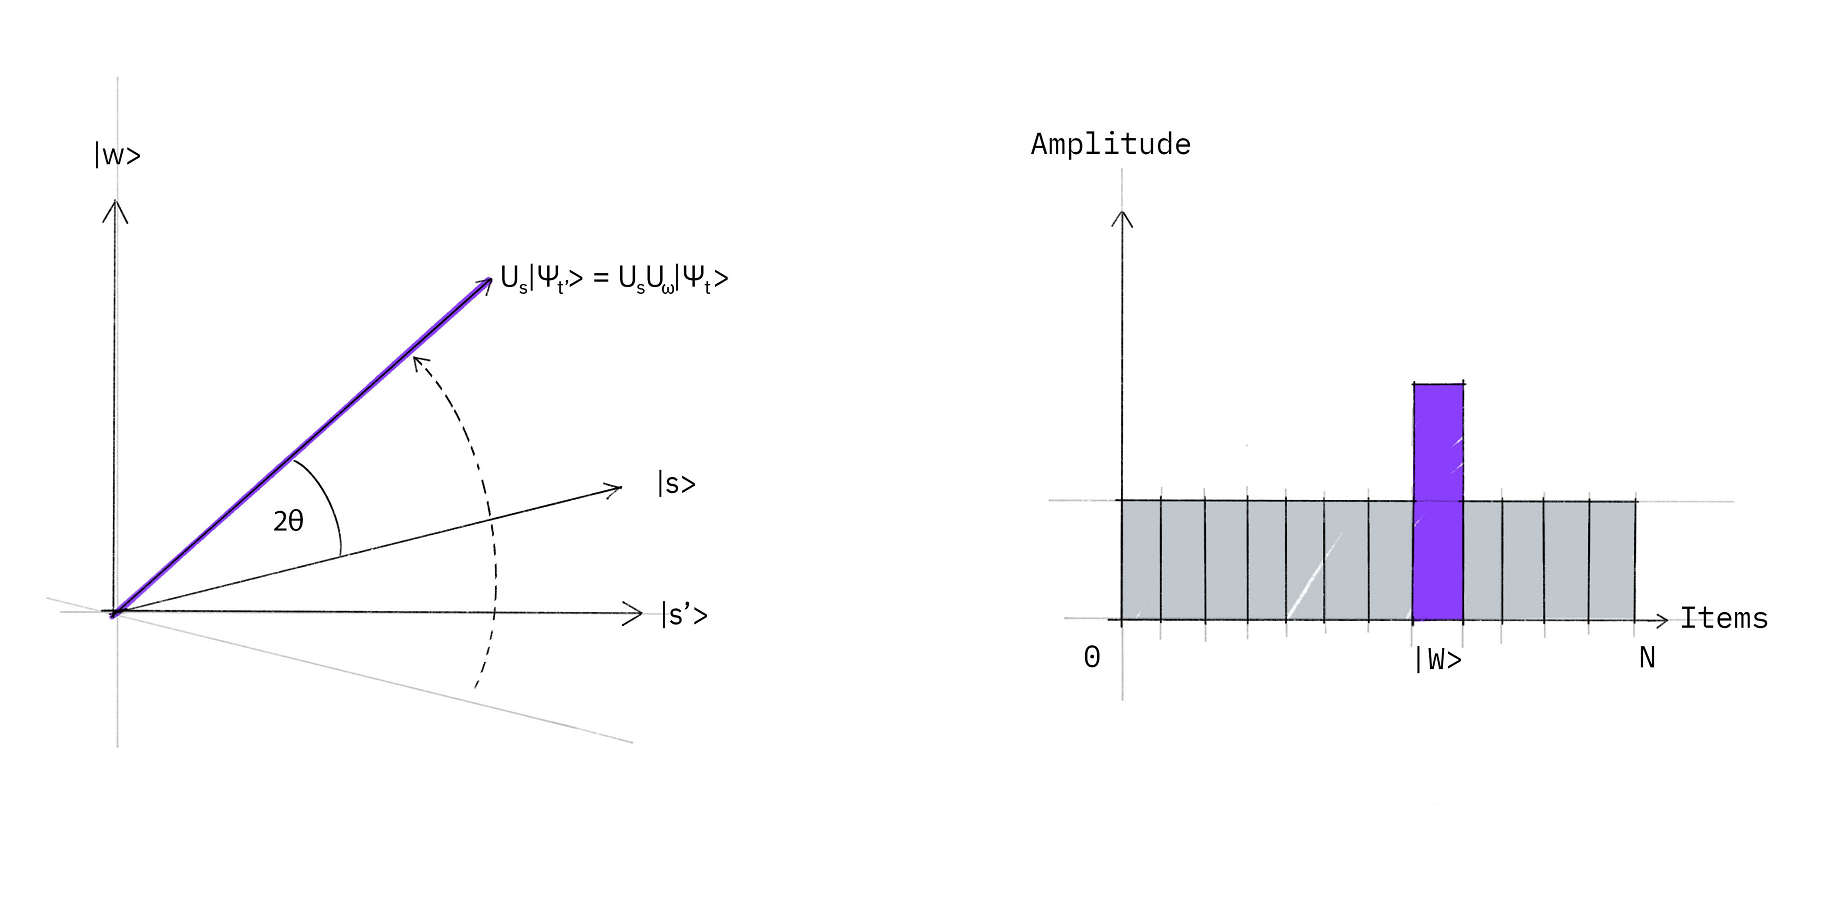

<p ><a href="https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm" target="_blank">Image obtained from the Qiskit Textbook</a></p>

Finally, Grover's algorithm looks like:

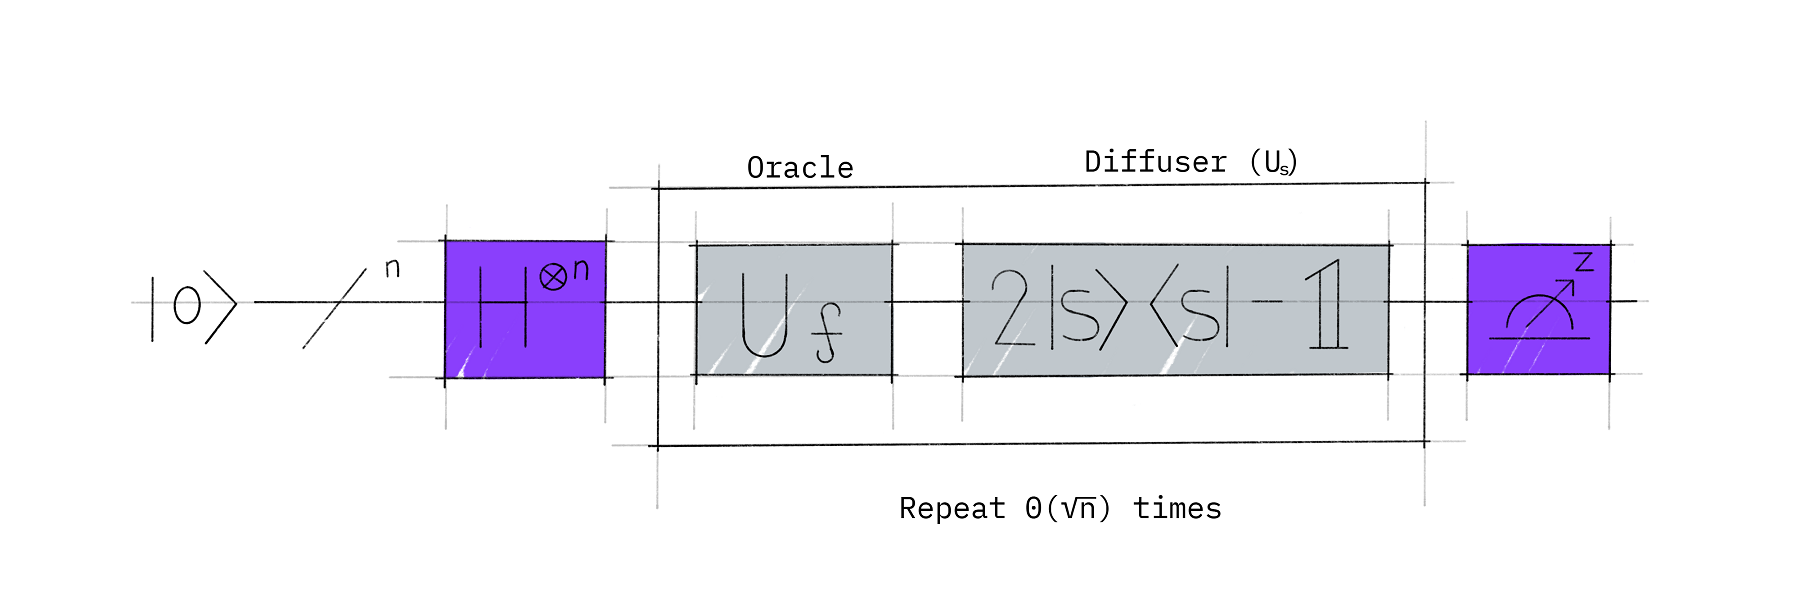

<p ><a href="https://learn.qiskit.org/course/ch-algorithms/grovers-algorithm" target="_blank">Imagen obtenida del Qiskit Textbook</a></p>



#### Application in Tic Tac Toe:

For Tic Tac Toe, Grover's algorithm can be applied to search for optimal moves on the game board. By defining the oracle to identify winning board configurations and implementing the Grover diffusion operator, we can efficiently determine the optimal moves that lead to victory.

<div>
<p style = 'text-align:center;'>
<img src="../Images/image9.png" alt="JuveYell" width="800px">
</p>
</div>


The concept revolves around assigning a qubit to each box, such that when the qubit is in the state |1>, it represents 'X', and when in the state |0>, it represents 'O'. The empty spaces are filled with Hadamard gates, as these states are the ones sought by the Grover's algorithm.


For this case, our Oracle consists of two crucial components. First, there are the eight victory conditions detailed in the preceding figure. However, it is essential to filter only valid plays based on both logic and the rules established earlier. Therefore, the Oracle is composed of two parts:

1. **Victory Conditions:**
   - The eight specific conditions determining a win in the game.

2. **X's Counter:**
   - A mechanism to count the total number of 'X' on the board. Since in any game where 'O' starts, there must be a total of 5 'O' and 4 'X', our counter verifies the presence of exactly 4 'X'.

Finally, it is imperative to mark the states that meet any of the eight winning conditions, always ensuring there are exactly 4 'X' throughout the game. For this reason, we implement eight controlled-NOT gates, one for each winning condition, targeting the oracle qubit. This approach ensures the validity of winning plays while adhering to the restriction of having 4 'X' in the game.




<div>
<p style = 'text-align:center;'>
<img src="../Images/parts_oracle_grover.jpg" alt="JuveYell" width="1200px">
</p>
</div>


In the preceding image, we can identify the most crucial part of our circuit. Each number represents a component of the total circuit:

1. **Tic Tac Toe Representation Circuit:**
   - This circuit represents the Tic Tac Toe game, where 'H' denotes empty spaces, NOT gates represent 'X's, and 'I's represent 'O's.

2. **Oracle Sub-Circuit:**
   - This sub-circuit is part of the oracle and encompasses all possible winning scenarios (8 in total).

3. **Counter:**
   - The counter activates a Multi-Controlled NOT gate only if the number of 'X's is equal to 4.

4. **State | - >:**
   - This state, when the required conditions are met, changes sign, marking the desired state.

5. **Toffoli Gates:**
   - Toffoli gates determine the sought-after states, activating when the necessary conditions are fulfilled.


The remainder of the circuit corresponds to the inverse of circuits 2 and 3 from the preceding figure, followed by the application of the diffuser. Finally, the qubits in the 'H' states are measured, as these are the ones sought based on the established conditions.


Now we will see the results of implementing Grover's algorithm for our specific problem.

In [17]:
from qiskit.visualization import plot_histogram

import sys
sys.path.append('../../')
from pkg.general_utils import display_board, complete_lists_with_dictionary, filter_values_above_average
from pkg.quantum_utils import grover_algorithm, circuit_execute

### Setting up the board the way it is asked to solve it

In [18]:
challenge = [['X', 'O', 'O'], ['X', ' ', ' '], ['O', ' ', ' ']]
display_board(challenge)

X | O | O
---------
X |   |  
---------
O |   |  
---------


### Building the complete circuit and graphing

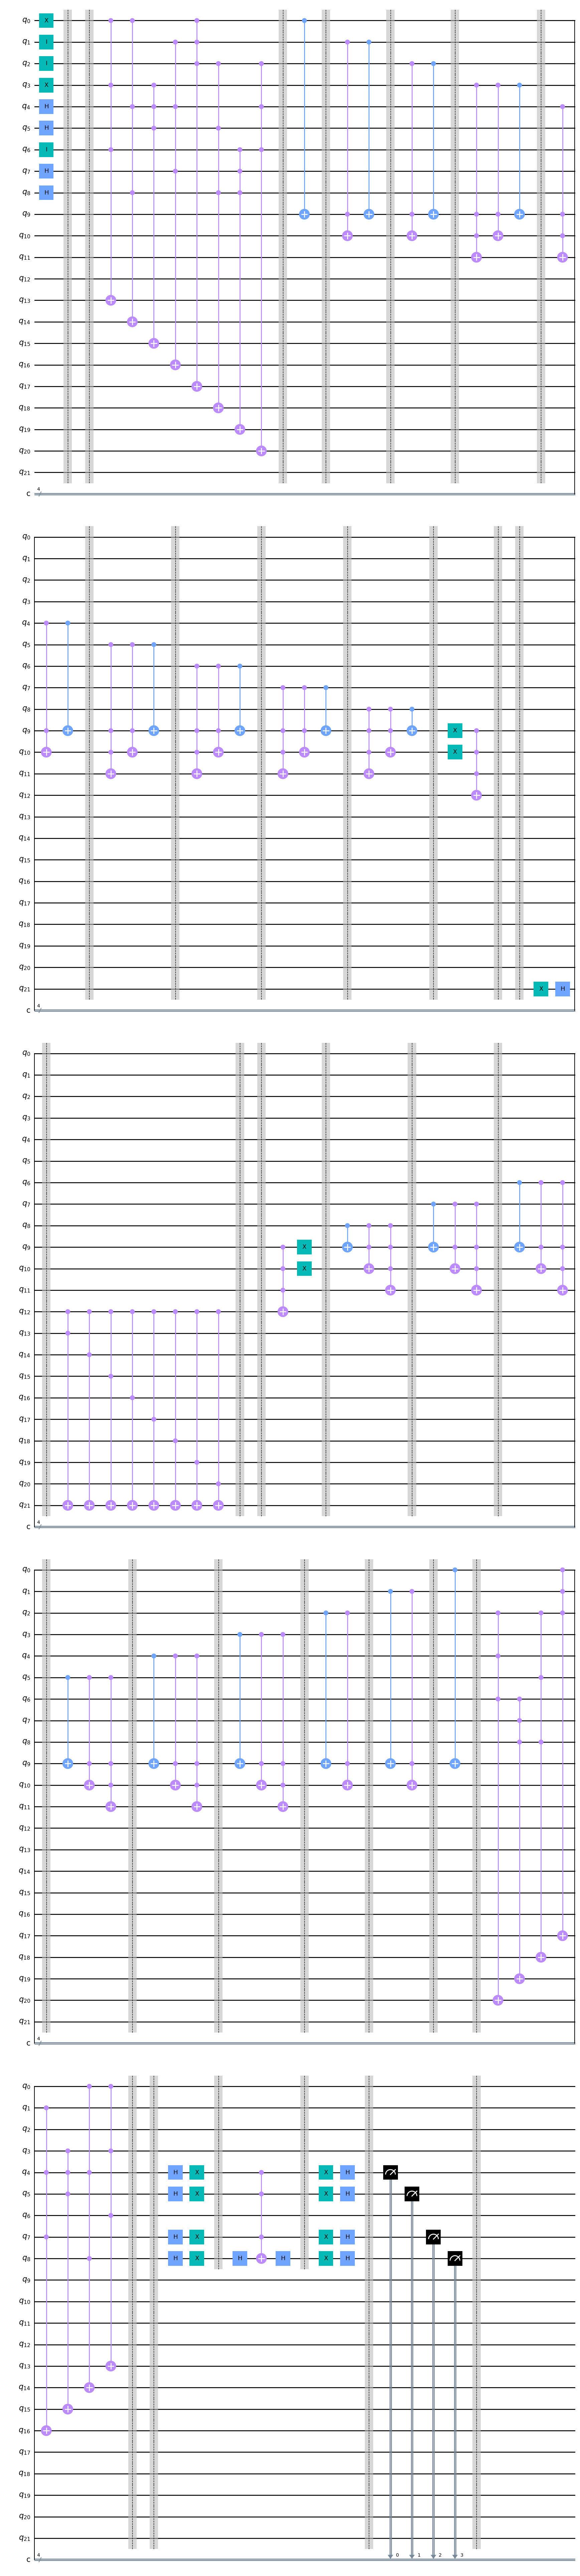

In [19]:
qc = grover_algorithm(challenge, rep=1)

qc.draw('mpl')

In [20]:
qc.draw('latex_source', filename='./grover_circuit_complete_image/file.tex')

'\\documentclass[border=2px]{standalone}\n\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{graphicx}\n\n\\begin{document}\n\\scalebox{1.0}{\n\\Qcircuit @C=1.0em @R=0.2em @!R { \\\\\n\t \t\\nghost{{q}_{0} :  } & \\lstick{{q}_{0} :  } & \\gate{\\mathrm{X}} \\barrier[0em]{21} & \\qw \\barrier[0em]{21} & \\qw & \\ctrl{3} & \\ctrl{4} & \\qw & \\qw & \\ctrl{1} & \\qw & \\qw & \\qw \\barrier[0em]{21} & \\qw & \\ctrl{9} \\barrier[0em]{21} & \\qw & \\qw & \\qw \\barrier[0em]{21} & \\qw & \\qw & \\qw \\barrier[0em]{21} & \\qw & \\qw & \\qw & \\qw \\barrier[0em]{21} & \\qw & \\qw & \\qw & \\qw \\barrier[0em]{21} & \\qw & \\qw & \\qw & \\qw \\barrier[0em]{21} & \\qw & \\qw & \\qw & \\qw \\barrier[0em]{21} & \\qw & \\qw & \\qw & \\qw \\barrier[0em]{21} & \\qw & \\qw & \\qw & \\qw \\barrier[0em]{21} & \\qw & \\qw & \\qw \\barrier[0em]{21} & \\qw \\barrier[0em]{21} & \\qw & \\qw & \\qw \\barrier[0em]{21} & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw & \\qw \\barrier[0em]{21} & \\qw \\barr

### Running the complete circuit and graphing the results

In [21]:
counts_without_qiskit_convention = circuit_execute(qc, shots=20000)
print(counts_without_qiskit_convention)

{'1011': 288, '0000': 293, '1000': 296, '0011': 317, '1101': 293, '1100': 7852, '1110': 315, '0111': 323, '1001': 7791, '1010': 319, '0010': 286, '1111': 329, '0101': 323, '0001': 298, '0110': 348, '0100': 329}


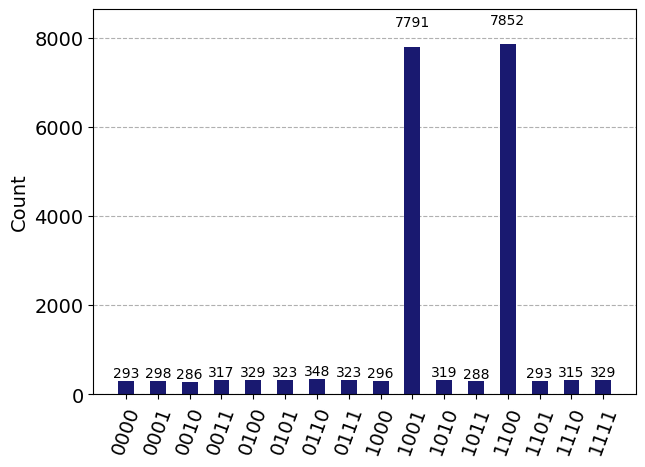

In [22]:
plot_histogram(counts_without_qiskit_convention, color='midnightblue')

In [23]:
possible_results = filter_values_above_average(counts_without_qiskit_convention)

print(possible_results)

{'1100': 7852, '1001': 7791}


In [24]:
completed_lists = complete_lists_with_dictionary(challenge, possible_results)

for i, lst in enumerate(completed_lists, start=1):
    print(f'List {i}: {lst}')

List 1: [['X', 'O', 'O'], ['X', 'X', 'X'], ['O', 'O', 'O']]
List 2: [['X', 'O', 'O'], ['X', 'X', 'O'], ['O', 'O', 'X']]


### Printing all possible valid results

In [25]:
print('Challenge:')
display_board(challenge)
print('\n')

for index, lst in enumerate(completed_lists):
    print('Solution {}:'.format(index + 1))
    display_board(lst)
    print('\n')


Challenge:
X | O | O
---------
X |   |  
---------
O |   |  
---------


Solution 1:
X | O | O
---------
X | X | X
---------
O | O | O
---------


Solution 2:
X | O | O
---------
X | X | O
---------
O | O | X
---------




### Post quantum analysis

It is evident for us that there are only two ways to win if we play as 'X'. The first is with the move |1100>, and the second is with the move |1001>, as shown in the results obtained by the implemented Grover's algorithm. Furthermore, we observe that for both winning plays, the 'X's played in the first available position. This implies that making this move increases the probability of winning, which makes sense since having this move with the 'X's provides two winning options in the next turn. However, if we analyze the 'O' move, meaning if 'O' plays in the third available position, then a guaranteed win is ensured, as the subsequent moves of 'X' become irrelevant.



<div>
<p style = 'text-align:center;'>
<img src="../Images/best_play.png" alt="JuveYell" width="100px">
</p>
</div>


## Bonus

In [26]:
challenge_bonus = [['X', 'O', 'O'], ['X', ' ', ' '], [' ', ' ', ' ']]
display_board(challenge_bonus)

X | O | O
---------
X |   |  
---------
  |   |  
---------


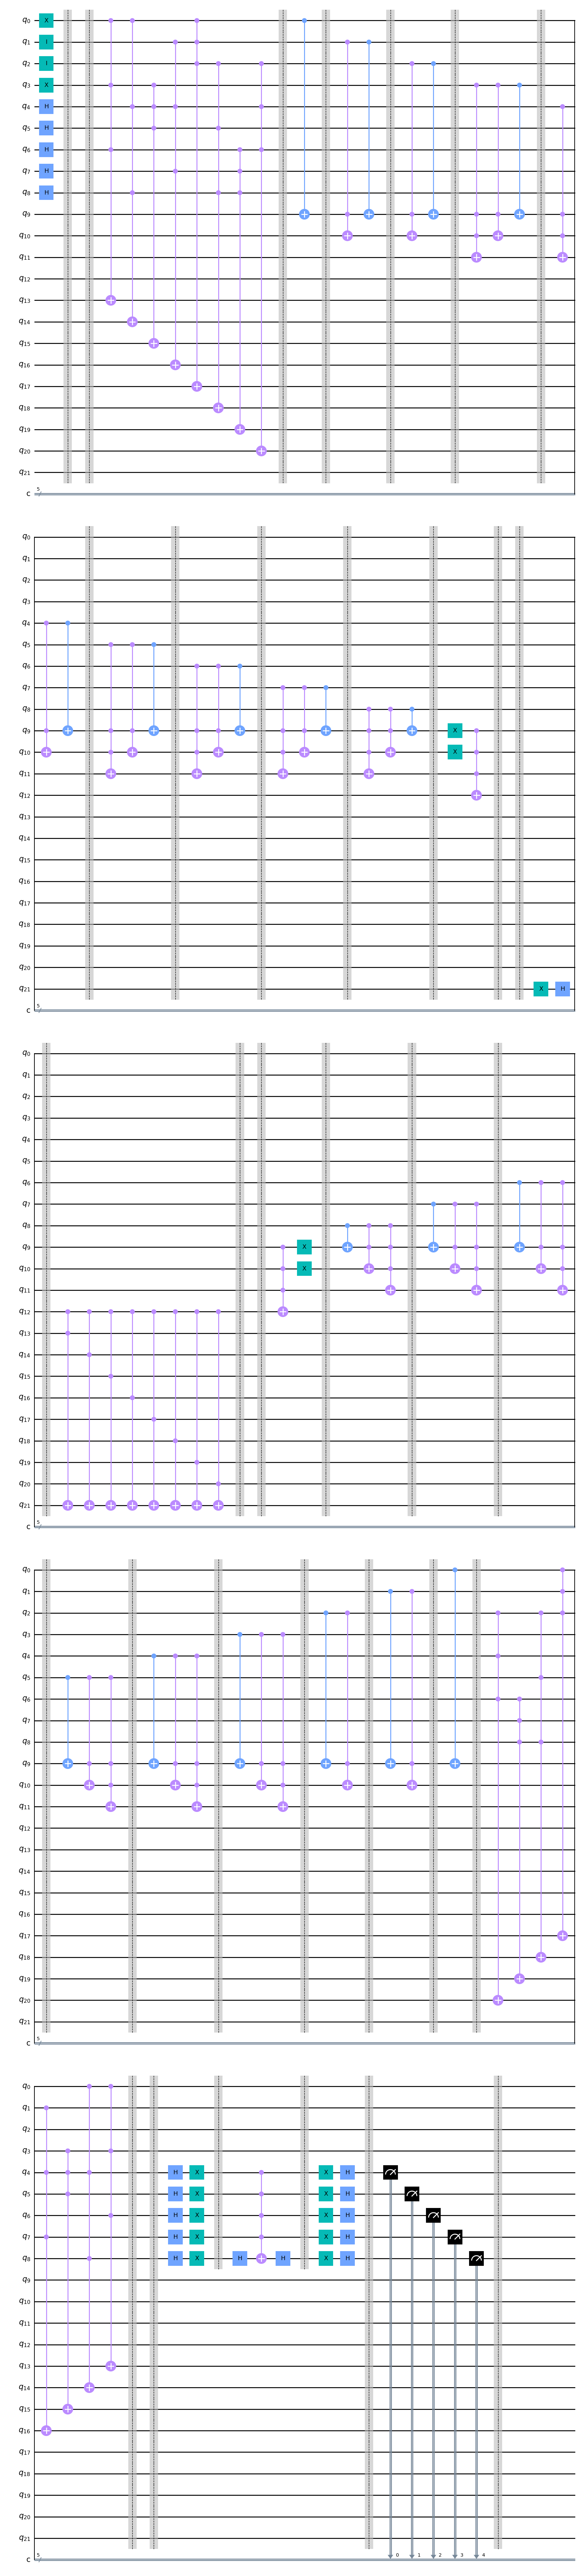

In [27]:
qc_bonus = grover_algorithm(challenge_bonus, rep=1)

qc_bonus.draw('mpl')

In [28]:

counts_without_qiskit_convention = circuit_execute(qc_bonus, shots=20000)
print(counts_without_qiskit_convention)

{'10010': 40, '00011': 47, '01111': 34, '10101': 31, '01001': 41, '00111': 28, '11111': 30, '11011': 37, '00001': 39, '01011': 41, '10100': 3164, '10001': 3212, '11010': 38, '11101': 40, '00101': 3080, '11000': 3170, '11100': 36, '10110': 38, '10000': 36, '01100': 3189, '00110': 3183, '00010': 34, '10111': 31, '01101': 42, '11110': 39, '01010': 48, '01000': 45, '01110': 51, '00100': 43, '00000': 36, '10011': 40, '11001': 37}


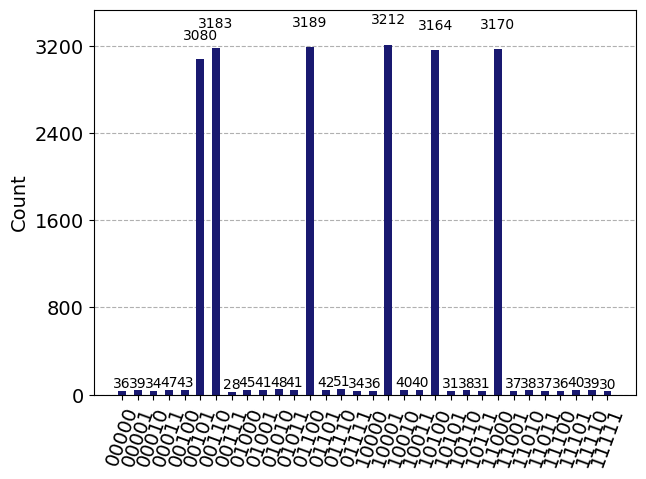

In [29]:
plot_histogram(counts_without_qiskit_convention, color='midnightblue')

In [30]:
possible_results = filter_values_above_average(counts_without_qiskit_convention)

print(possible_results)

{'10100': 3164, '10001': 3212, '00101': 3080, '11000': 3170, '01100': 3189, '00110': 3183}


In [31]:
completed_lists = complete_lists_with_dictionary(challenge, possible_results)

for i, lst in enumerate(completed_lists, start=1):
    print(f'List {i}: {lst}')

List 1: [['X', 'O', 'O'], ['X', 'X', 'O'], ['O', 'X', 'O']]
List 2: [['X', 'O', 'O'], ['X', 'X', 'O'], ['O', 'O', 'O']]
List 3: [['X', 'O', 'O'], ['X', 'O', 'O'], ['O', 'X', 'O']]
List 4: [['X', 'O', 'O'], ['X', 'X', 'X'], ['O', 'O', 'O']]
List 5: [['X', 'O', 'O'], ['X', 'O', 'X'], ['O', 'X', 'O']]
List 6: [['X', 'O', 'O'], ['X', 'O', 'O'], ['O', 'X', 'X']]


In [32]:
print('Challenge:')
display_board(challenge)
print('\n')

for index, lst in enumerate(completed_lists):
    print('Solution {}:'.format(index + 1))
    display_board(lst)
    print('\n')

Challenge:
X | O | O
---------
X |   |  
---------
O |   |  
---------


Solution 1:
X | O | O
---------
X | X | O
---------
O | X | O
---------


Solution 2:
X | O | O
---------
X | X | O
---------
O | O | O
---------


Solution 3:
X | O | O
---------
X | O | O
---------
O | X | O
---------


Solution 4:
X | O | O
---------
X | X | X
---------
O | O | O
---------


Solution 5:
X | O | O
---------
X | O | X
---------
O | X | O
---------


Solution 6:
X | O | O
---------
X | O | O
---------
O | X | X
---------




### Post quantum analysis

Para este caso tambien podemos hacer el analisis post cuantico. Para saber que jugadas podrían darnos una mayor probabilidad de ganar:


<div>
<p style = 'text-align:center;'>
<img src="../Images/best_play_bonus.png" alt="JuveYell" width="200px">
</p>
</div>

We can observe that the optimal move for 'X' is marking the third playable box (in red), which logically results in an automatic win. On the other hand, if 'O' plays in the fourth possible box (in blue), it also increases our chances of winning, as the displayed results are for 'X' winning scenarios. Finally, we can notice that the second-best move for 'X' after 'O' has played is to choose the first available box (in green).


The file `general_solution.ipynb` includes a function that generates a random initial game configuration. Subsequently, the execution of the algorithm yields results where 'X' emerges victorious. In such instances, post-quantum analysis could be performed, although results may vary across each execution. Two specific cases are highlighted for a comprehensive understanding.


## 3. Conclusion

   - The flexibility of the oracle demonstrates Grover's versatility in addressing specific game conditions.

Grover provides an  adaptable quantum solution for Tic Tac Toe, though the outcomes are statistically variable due to the quantum nature of the algorithm.*